# Diabetes Data Analysis

The [Diabetes Data](https://www.kaggle.com/uciml/pima-indians-diabetes-database) from Kaggle is being used for this project. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_df.shape

(768, 9)

We can observe that the data set contain 768 entries with 9 columns. Of these 9 columns, 8 are features and 1 is the target column which is 'Outcome'. 'Outcome' is the column which we are going to predict, which says if the patient is diabetic or not. 1 means the person is diabetic and 0 means a person is not. 

In [10]:
diabetes_df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

We can see that out of the 768 people, 500 are labeled as 0 (non-diabetic) and 268 as 1 (diabetic).

## EDA

Let's check the correlation between all the features and the outcome column.

In [11]:
diabetes_corr = diabetes_df.corr()

In [12]:
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

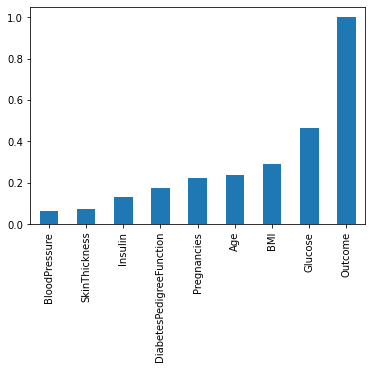

In [18]:
diabetes_corr['Outcome'].sort_values().plot(kind='bar')

We can see that the features which are most correlated to the Outcome column are Glucose, BMI, Age, Pregnancies, Diabetes Pedigree Function and Insulin. Skin Thickness and Blood Pressure seem to be the least correlated to the Outcome column.

Let us now see how the pairs of features are correlated with each other as well along with the correlation to Outcome column.

<AxesSubplot:>

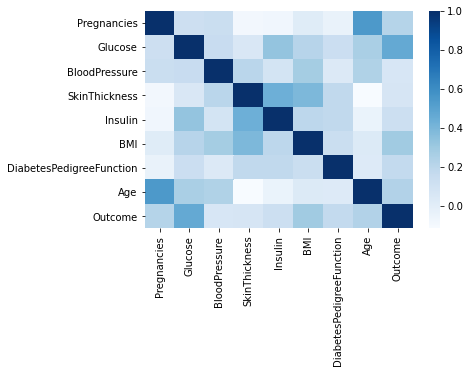

In [20]:
sns.heatmap(diabetes_corr, cmap='Blues')

We can observe that there are correlations between the features as well, like, Age is highly correlated to Pregnancies and Glucose is correlated to Insulin. 

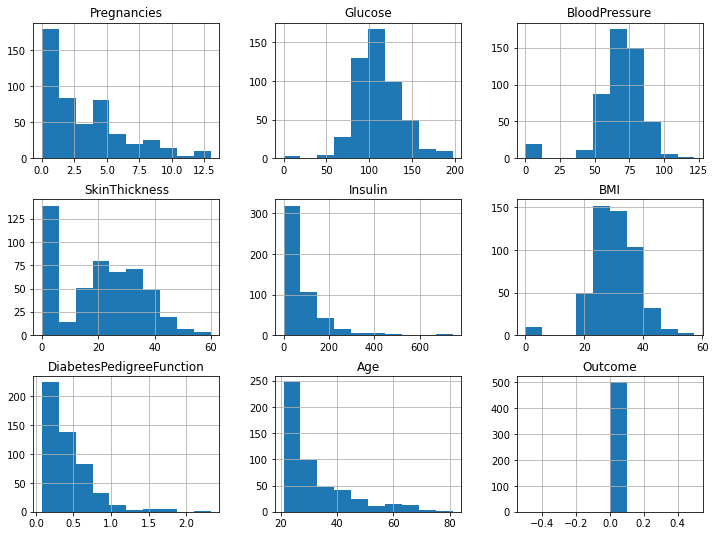

In [27]:
diabetes_df[diabetes_df['Outcome']==0].hist(figsize=(12, 9));

We can see from the above plot how the distribution of various features are for people with 'Outcome' as 0 i.e non-diabetic. We can observe that the pregnancies are lesser (most of the females have less than 5 pregnancies), Glucose levels are between 75 and 150 for most of them and most of the females are aged less than 40.

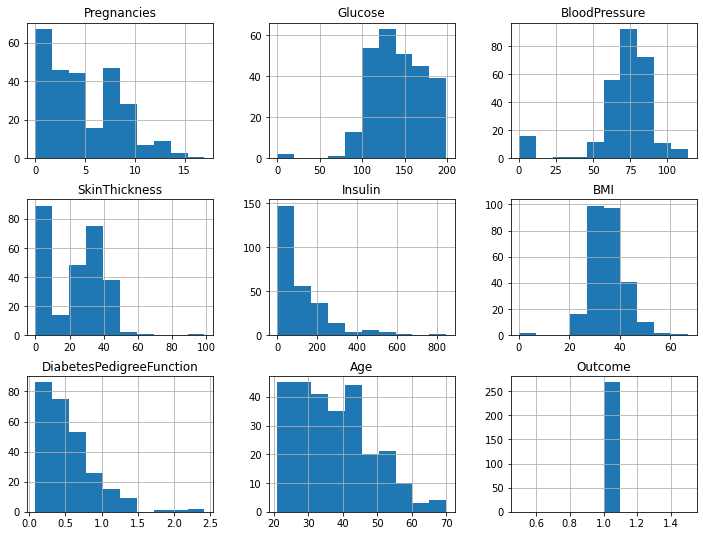

In [28]:
diabetes_df[diabetes_df['Outcome']==1].hist(figsize=(12, 9));

Here from the above plot where the 'Outcome' as 1 i.e for females who are diabetic, we can observe that the pregnancies are between 0-10 (higher range as compared to non-diabetic), Glucose levels are between 100 and 200 for most of them and most of the females are aged between 20 and 50 (the age range is higher). We also observe that there are more females with BMI greater than 25.

From the above two plots we also observe that there are few values which are assigned as 0 which doesn't make sense in few features like Blood Pressure, BMI, Glucose. First we need to clean this data.